## 调用 sklearn knn 函数实现分类
数据采用经典的 iris 数据， 三分类问题

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
print(X.shape, y.shape)

(150, 4) (150,)


In [3]:
# 拆分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2003)

In [4]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [5]:
# 计算准确率
from sklearn.metrics import accuracy_score
correct = np.count_nonzero((clf.predict(X_test)==y_test)==True)
print("Accuracy is : %.4f" % (correct / len(X_test)))

Accuracy is : 0.9211


## 从零开始实现 KNN 算法

In [6]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
from collections import Counter # 为了做投票使用

iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2003)

### 欧式距离

公式
在欧几里得空间中，点 $x = (x_1,...,x_n)$ 和 $y = (y_1,...,y_n)$之间的欧式距离为：

$$
d(x,y) := \sqrt {(x_1 - y_1)^2 + (x_2 - y_2)^2 + ... + (x_n - y_n)^2}
\\ = \sqrt {\sum_{i=1}^{n}(x_i - y_i)^2}
$$

In [7]:
def euc_dis(instance1, instance2):
    """
    计算两个样本 instance1 和 instance2 之间的欧式距离
    instance1: 第一个样本， array 型
    instance2: 第二个样本， array 型
    """
    dist = np.sqrt(sum((instance1 - instance2) ** 2))
    return dist

def knn_classify(X, y, testInstance, k):
    """
    给定一个测试数据 testInstance, 通过KNN 算法来预测它的标签。
    X: 训练数据的特征
    y: 训练数据的标签
    testInstance: 测试数据，这里假定一个测试数据 array 型
    K: 选择多少个 neighbors?
    """
    
    distances = [euc_dis(x, testInstance) for x in X]
    # 返回下标，从 0 开始，最小的距离的下标，取 k 个
    kneighbors = np.argsort(distances)[:k]
    # 统计当前最小距离的，有多少个 0, 多少个 1， 多少个2
    count = Counter(y[kneighbors])
    # most_common 提取主要比较多的共同次数的 0,1,2
    return count.most_common()[0][0]

In [8]:
predictions = [knn_classify(X_train, y_train, data, 3) for data in X_test]
correct = np.count_nonzero((predictions==y_test)==True)
print ("Accuracy is: %.4f" %(correct/len(X_test)))

Accuracy is: 0.9211


## KNN 的决策边界

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import product
from sklearn.neighbors import KNeighborsClassifier

# 生成一些随机样本
n_points = 100
X1 = np.random.multivariate_normal([1,50], [[1,0], [0,10]], n_points)
X2 = np.random.multivariate_normal([2,50], [[1,0], [0,10]], n_points)

X = np.concatenate([X1, X2])
y = np.array([0]*n_points + [1]*n_points)

In [10]:
# KNN 模型训练过程
clfs = []
# 选择的 k 值
neighbors = [1,3,5,9,11,13,15,17,19]
for i in range(len(neighbors)):
    clfs.append(KNeighborsClassifier(n_neighbors=neighbors[i]).fit(X,y))

### 可视化边界结果

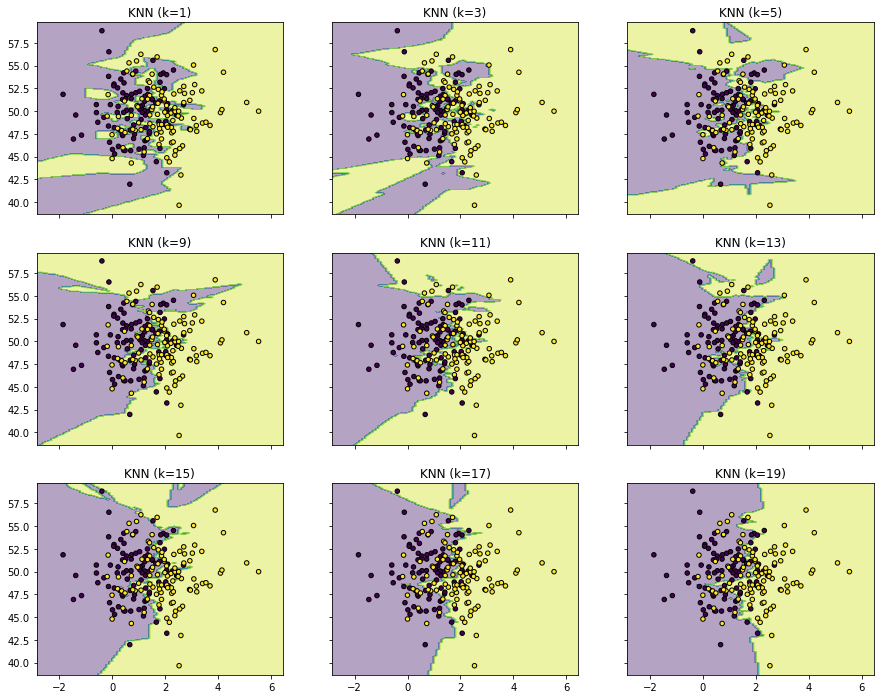

In [11]:
x_min = X[:, 0].min() - 1
x_max = X[:, 0].max() + 1

y_min = X[:, 1].min() - 1
y_max = X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(3,3, sharex='col', sharey='row', figsize=(15, 12))
for idx, clf, tt in zip(product([0, 1, 2], [0, 1, 2]),
                        clfs,
                        ['KNN (k=%d)'%k for k in neighbors]):
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)
    
plt.show()